<a href="https://colab.research.google.com/github/juliacolaci11/2024UCALCD002./blob/main/Trabajo_Final_Ciencias_De_Datos_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importan las librerias a utilizar para analizar los datos


In [43]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import  classification_report

Se sube el archivo

In [44]:
datos=pd.read_csv("framingham.csv")

Se visualizan las primeras 10 filas del dataset, se obtienen estadíaticas descriptivas y una descripción de la estructura de los datos

In [45]:
datos.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [46]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [47]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Se grafican las categorías para observar la distribución de los datos

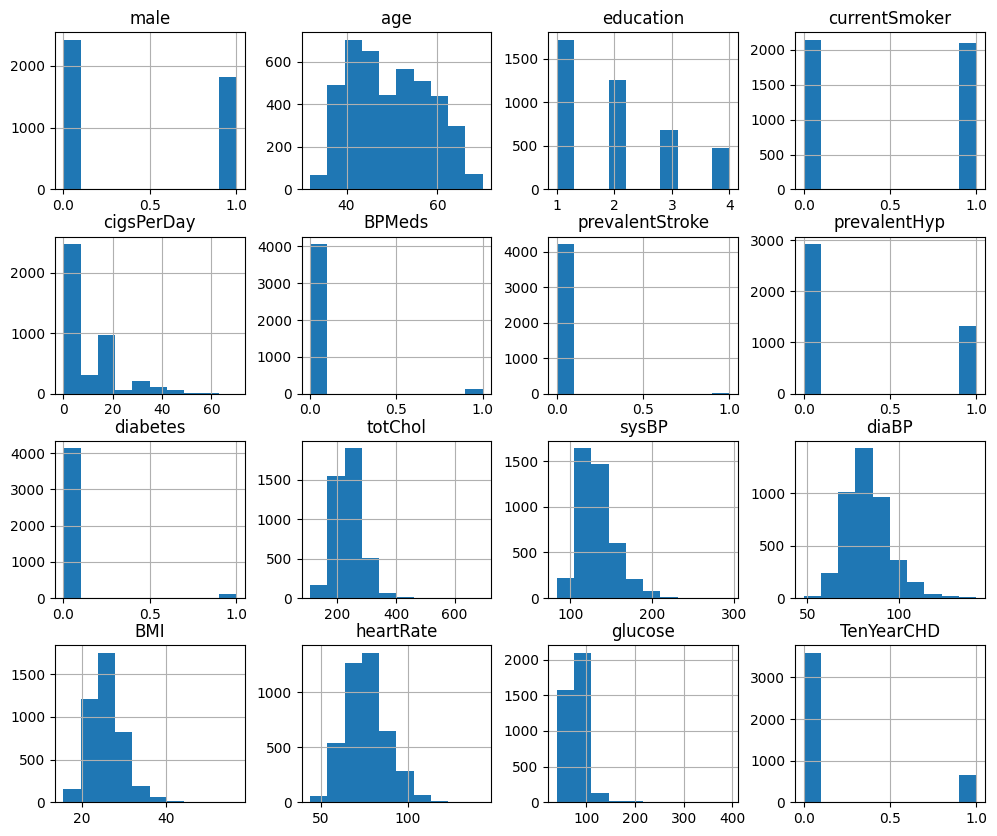

In [6]:
ax = datos.hist(figsize=(12, 10))

Se borran las columnas de datos innecesarias; BPMeds, Diabetes, Prevalent Stroke y Education

In [7]:
datos = datos.drop(["BPMeds", "diabetes", "prevalentStroke", "education"], axis=1)

Se corrobora que no haya nulos

In [8]:
missing_values = datos.isnull().sum()
missing_values

male               0
age                0
currentSmoker      0
cigsPerDay        29
prevalentHyp       0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
TenYearCHD         0
dtype: int64

Se imputan los datos faltantes con la media

In [9]:
datos["glucose"].fillna(datos["glucose"].mean(), inplace=True)
datos["BMI"].fillna(datos["BMI"].mean(), inplace=True)
datos["heartRate"].fillna(datos["heartRate"].mean(), inplace=True)
datos["totChol"].fillna(datos["totChol"].mean(), inplace=True)
datos["cigsPerDay"].fillna(datos["cigsPerDay"].mean(), inplace=True)

In [10]:
datos.isnull().sum()

male             0
age              0
currentSmoker    0
cigsPerDay       0
prevalentHyp     0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

Se calcula la matriz de correlacion

In [11]:
correlation_matrix = datos.corr().round(2)

Se visualiza la relación entre categorías mediante un mapa de calor

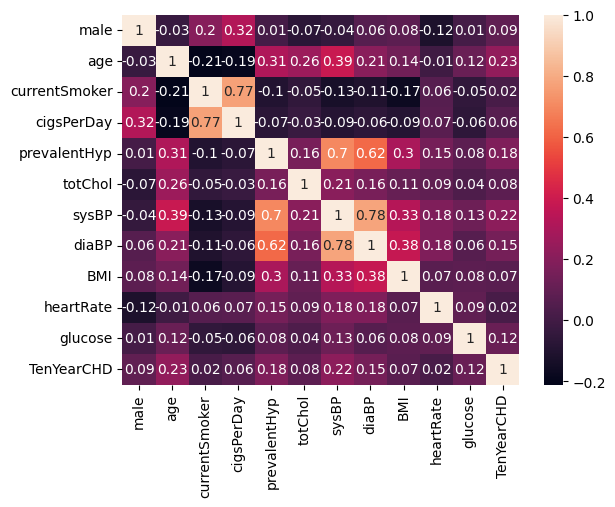

In [12]:
sb.heatmap(correlation_matrix,annot=True);

Se define la variable objetivo y se elimina para estandarizar el resto de las categorías

In [13]:
Y = datos['TenYearCHD']

In [14]:
datos.drop('TenYearCHD',inplace=True, axis=1)
datos

,male,age,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,1,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,1,43.0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,1,20.0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1,15.0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4238 non-null   int64  
 1   age            4238 non-null   int64  
 2   currentSmoker  4238 non-null   int64  
 3   cigsPerDay     4238 non-null   float64
 4   prevalentHyp   4238 non-null   int64  
 5   totChol        4238 non-null   float64
 6   sysBP          4238 non-null   float64
 7   diaBP          4238 non-null   float64
 8   BMI            4238 non-null   float64
 9   heartRate      4238 non-null   float64
 10  glucose        4238 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 364.3 KB


Se crea un objeto StandardScaler y se escalan los datos utilizando el método fit_transform

In [16]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(datos)

Se visualizan las variables X escaladas

In [17]:
scaled_X

array([[ 1.1531919 , -1.23495068, -0.98827076, ...,  0.28694273,
         0.34274444, -0.21751656],
       [-0.86715836, -0.41825733, -0.98827076, ...,  0.71932499,
         1.59027451, -0.26131108],
       [ 1.1531919 , -0.18491638,  1.01186844, ..., -0.11350221,
        -0.07309892, -0.52407818],
       ...,
       [-0.86715836, -0.18491638,  1.01186844, ..., -0.93404582,
         0.67541912,  0.17663409],
       [-0.86715836, -0.65159829,  1.01186844, ..., -1.63175357,
         0.84175647,  0.        ],
       [-0.86715836,  0.28176554, -0.98827076, ..., -1.06425185,
         0.34274444,  1.09631895]])

In [18]:
scaled_X = pd.DataFrame(scaled_X)
scaled_X.columns = datos.columns

Se grafican las categorías  escaladas

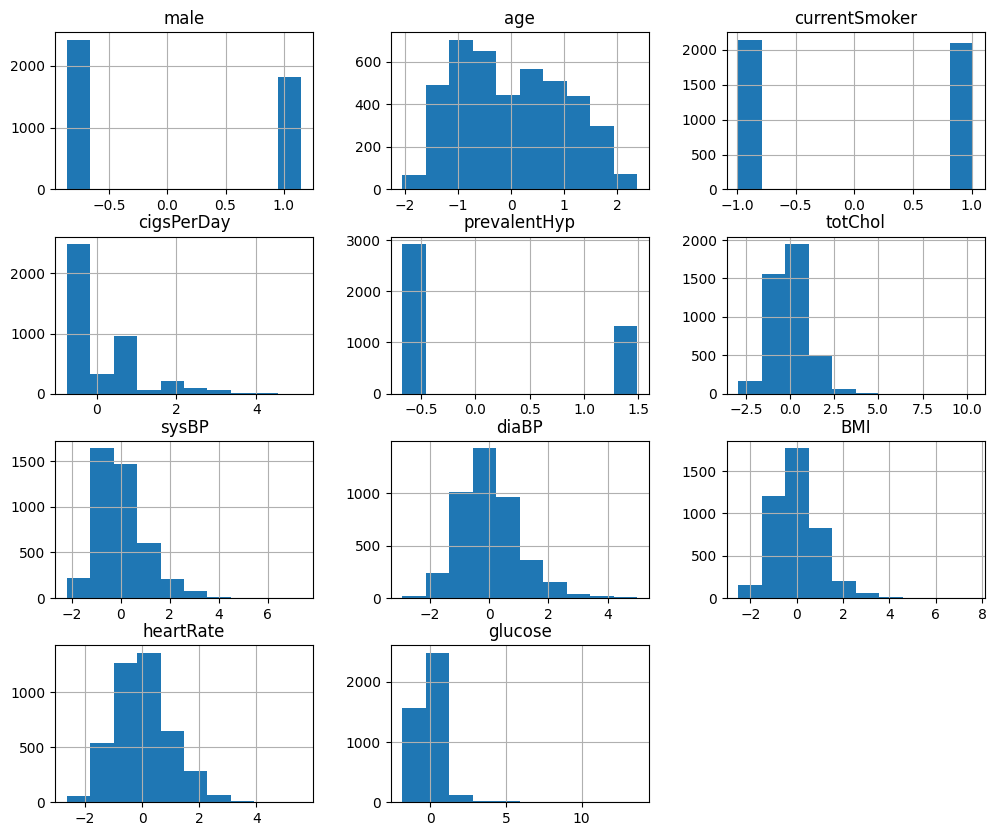

In [19]:
ax = scaled_X.hist(figsize=(12, 10))

Se identifica la variable objetivo (Y) y las caracteríasticas (x, escaladas). Se dividen los datos en conjuntos de Entrenamiento y Prueba, 80% para el conjunto de entrenamiento y 20% para el conjunto de prueba.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.20, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3390, 11), (848, 11), (3390,), (848,))

Se comienza con el entrenamiento del modelo de regresión logística

In [21]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

Se realizan predicciones con el modelo

In [22]:
lr_predict = lr.predict(X_test)

Se calcula la precision del modelo y la matriz de confusión

In [23]:
lr_acc_score = accuracy_score(y_test, lr_predict)

In [24]:
print("Precisión del modelo:", lr_acc_score)

Precisión del modelo: 0.8443396226415094


In [25]:
lr1_predict = lr.predict(X_train)

In [26]:
lr1_acc_score = accuracy_score(y_train, lr1_predict)
print(lr1_acc_score)

0.8578171091445428


Se calcula la matriz de confusión de la regresión logística

In [27]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)

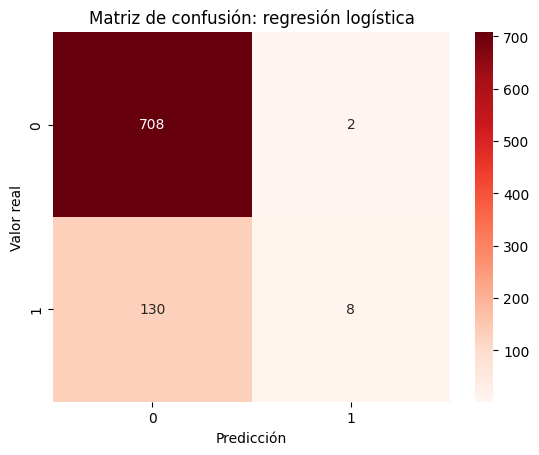

In [28]:
df4 = pd.DataFrame(lr_conf_matrix, index=lr.classes_, columns=lr.classes_)
sb.heatmap(df4, annot=True, cmap='Reds', fmt='g')
plt.title('Matriz de confusión: regresión logística')
plt.ylabel('Valor real'), plt.xlabel('Predicción')
plt.show()

Se imprime el reporte de clasificación

In [29]:
print("Reporte de clasificación:")
print(classification_report(y_test, lr_predict))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       0.80      0.06      0.11       138

    accuracy                           0.84       848
   macro avg       0.82      0.53      0.51       848
weighted avg       0.84      0.84      0.78       848



Se pone a prueba el modelo

In [30]:
paciente1 = [1, 60, 1, 30, 1, 313, 180, 115, 31, 95, 103]
prediccion = lr.predict([paciente1])
if prediccion[0] == 0:
    print("No tiene riesgo de enfermedad coronaria")
else:
    print("Tiene riesgo de enfermedad coronaria")
print(prediccion)

Tiene riesgo de enfermedad coronaria
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


-------------------------------------------------------------

Se empieza con el modelo de árbol de decisión

Se comienza con el entrenamiento del modelo

In [31]:
dt = DecisionTreeClassifier(random_state=0, max_depth=6)
X_tr, X_tt, y_tr, y_tt = train_test_split(scaled_X, Y, test_size=0.20)

In [32]:
dt.fit(X_tr, y_tr)

DecisionTreeClassifier(max_depth=6, random_state=0)

Se realizan predicciones con el modelo

In [33]:
dt_predicted = dt.predict(X_tt)
dt_predicted1 = dt.predict(X_tr)

Se calcula la precisión del modelo

In [34]:
dt_acc_score = accuracy_score(y_tt, dt_predicted)
print(dt_acc_score)

0.8372641509433962


In [35]:
dt_acc_score = accuracy_score(y_tr, dt_predicted1)
print(dt_acc_score)

0.8707964601769912


Se calcula la matriz de confusión del arbol de decisión

In [36]:
dt_conf_matrix = confusion_matrix(y_tt, dt_predicted)

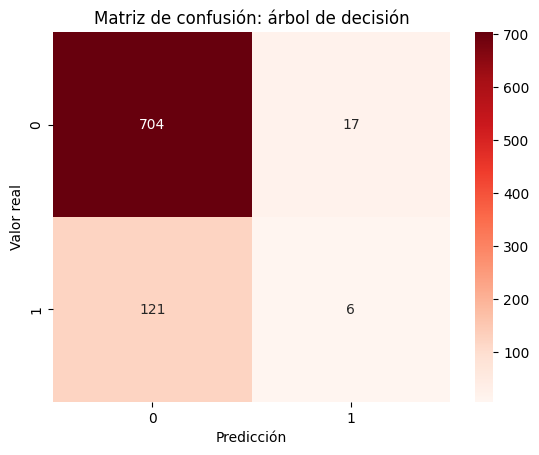

In [37]:
df4 = pd.DataFrame(dt_conf_matrix, index=dt.classes_, columns=dt.classes_)
sb.heatmap(df4, annot=True, cmap='Reds', fmt='g')
plt.title('Matriz de confusión: árbol de decisión')
plt.ylabel('Valor real'), plt.xlabel('Predicción')
plt.show()

Se imprime el reporte de clasificacion

In [38]:
print("Reporte de clasificación:")
print(classification_report(y_tt, dt_predicted))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       721
           1       0.26      0.05      0.08       127

    accuracy                           0.84       848
   macro avg       0.56      0.51      0.50       848
weighted avg       0.76      0.84      0.79       848



Se visualiza el árbol de decisión

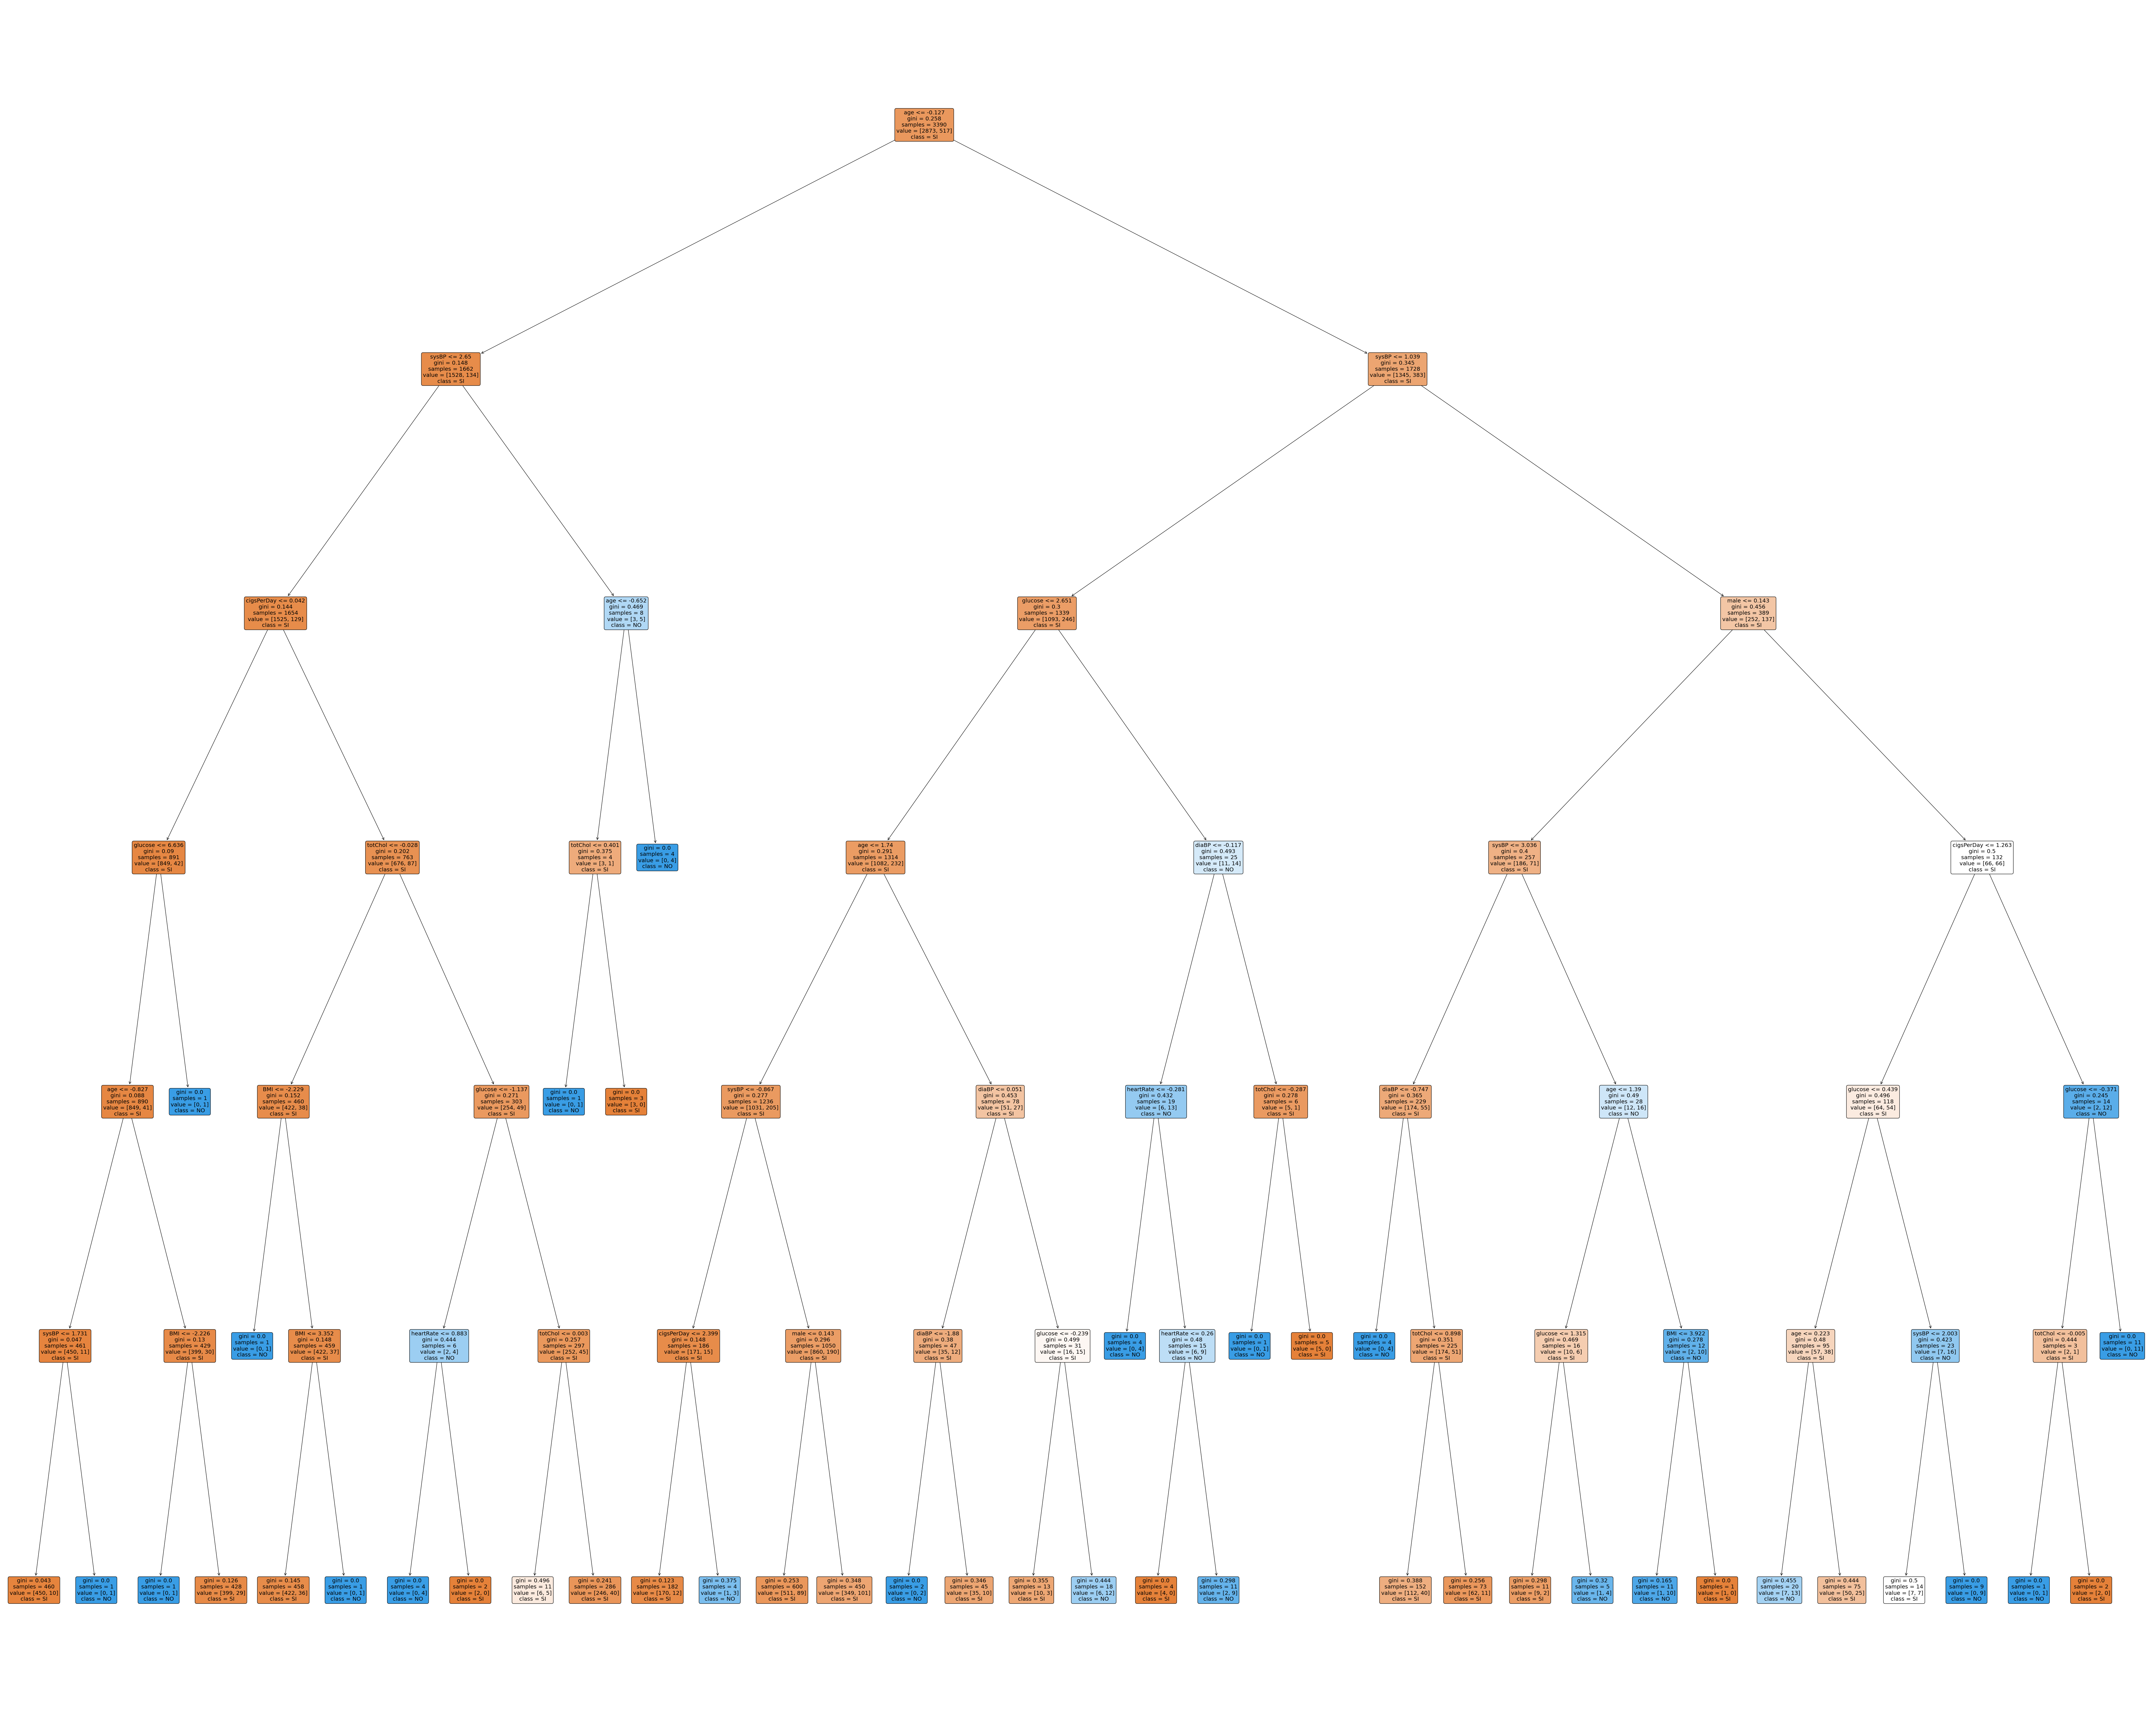

In [39]:
plt.figure(figsize=(100, 80))
plot_tree(
    dt,
    feature_names=X_tt.columns,
    class_names=['SI','NO'],
    filled=True,
    rounded=True
);

Se pone a prueba modelo

In [40]:
paciente2 = [1, 25, 0, 0, 0, 190, 112, 71, 23, 60, 61]
prediccion = dt.predict([paciente2])
if prediccion == 0:
    print("No tiene riesgo de enfermedad coronaria")
else:
    print("Tiene riesgo de enfermedad coronaria")
print(prediccion)

Tiene riesgo de enfermedad coronaria
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Comparamos la precision de ambos modelos

In [41]:
model_ev = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [lr_acc_score * 100, dt_acc_score * 100]
})
print(model_ev)

                 Model   Accuracy
0  Logistic Regression  84.433962
1        Decision Tree  87.079646


Se realiza una comparacion visual de ambos modelos

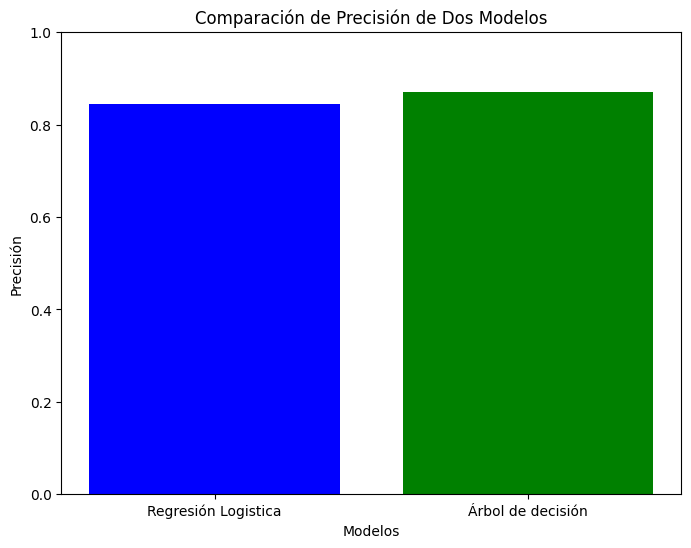

In [42]:
accuracy_model_1 = lr_acc_score
accuracy_model_2 = dt_acc_score
models = ['Regresión Logistica', 'Árbol de decisión']
accuracies = [accuracy_model_1, accuracy_model_2]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Rango de precisión de 0 a 1
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión de Dos Modelos')
plt.show()
import matplotlib.pyplot as plt